# Practice 8

### Problem


Take the spectra and calibration curves from ./practice_8_data/. 

This is a spectrum of a white LED, repeated multiple times because of higher-order diffraction (at wavelenghts above 800 nm).

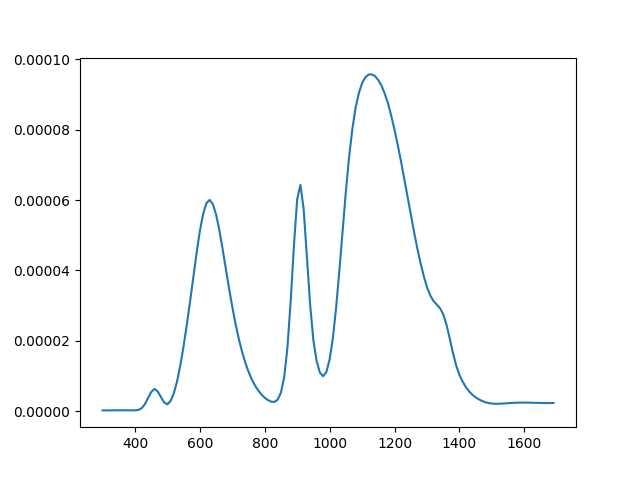

The real spectrum of WLED is like this, so we need  data only from 400 to 800 nm.

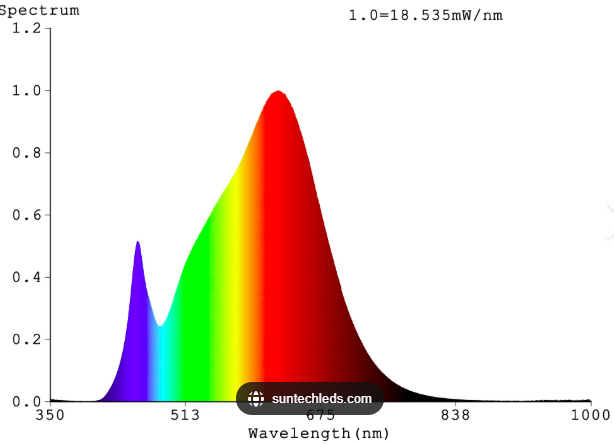

Recalculate the calibration curve to the spectral step (or vice versa) and perform calibration by dividing the spectral data by the calibration data.

PS The calibration curve shows the sensitivity of the detector at different wavelengths, and dividing by it allows you to correct data for different detector sensitivities. For example, such curves showing the spectral sensitivity of a photodetector can be found here https://www.thorlabs.de/newgrouppage9.cfm?objectgroup_id=3341&pn=PM100D

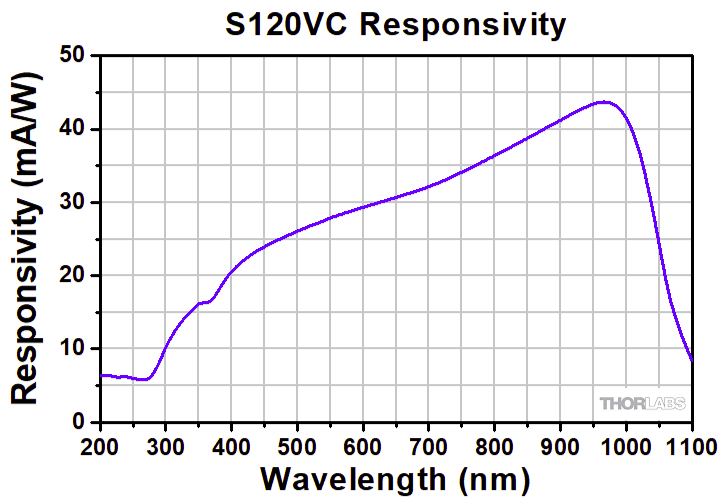

### Solution

In [17]:
import numpy as np
import matplotlib.pyplot as plt

path = './practice_8_data/sensitivity/'
sens_file = 'S130C_sensitivity_ed.txt'
exper_file = 'spectrum_20241024_144629_ed.txt'

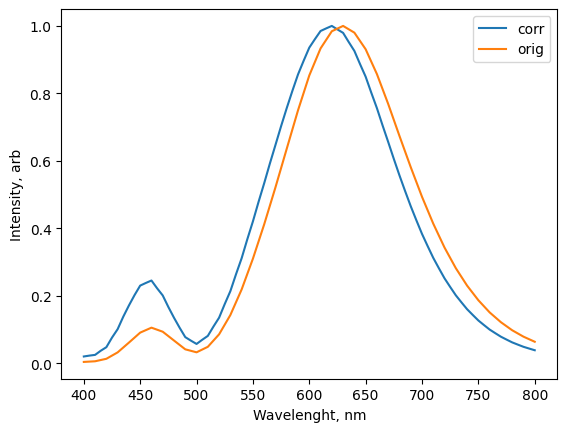

In [18]:
#load data
sens = np.loadtxt(path + sens_file, delimiter='\t')
exper =  np.loadtxt(path + exper_file, delimiter=',')

x = sens[:, 0]

exper_interp = np.interp(x, exper[:, 0], exper[:, 1])

corrected = exper_interp/sens[:, 1]
'''
plt.plot(x, corrected, label='corr')
plt.plot(x, exper_interp, label='orig')
'''
plt.plot(x, corrected/np.max(corrected), label='corr')
plt.plot(x, exper_interp/np.max(exper_interp), label='orig')

plt.xlabel('Wavelenght, nm')
plt.ylabel('Intensity, arb')
plt.legend()
plt.show()

## Problem 2

Read and write data with microcontroller Arduino.

(Compare reading data from COM port in Python and in c++ https://www.geeksforgeeks.org/serial-port-connection-in-cpp/)

In [1]:
# https://forum.arduino.cc/t/using-python-to-read-and-process-serial-data-from-arduino/1059079

import serial


def readserial(comport, baudrate):

    ser = serial.Serial(comport, baudrate, timeout=0.1)         # 1/timeout is the frequency at which the port is read

    while True:
        data = ser.readline().decode().strip()
        if data:
            print(data)


if __name__ == '__main__':

    readserial('COM4', 9600)

aaaaaaaaa
aaaaaa
aaaa
aaa
a
aaaa
aaaa
aa
aaaa


KeyboardInterrupt: 

Now try try the problem from 12th lecture.



## Problem 3

Calculate color using spectra.

See the Appendix to lectures and files in a subfolder

### Solution

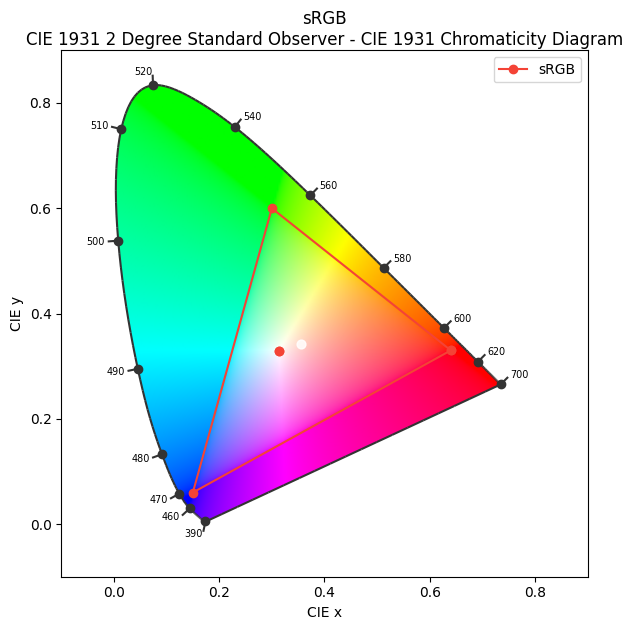

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [3]:
# Testing

import numpy as np
#from colour.plotting import *
import matplotlib.pyplot as plt

RGB = np.array([[79, 52, 45]])# , [87, 22, 67]

#RGB = colour.models.eotf_inverse_sRGB(np.array([255, 0, 0]) * 255)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB)

#plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB, 'ITU-R BT.709')


In [13]:
import numpy as np
#from colour.plotting import *
import matplotlib.pyplot as plt

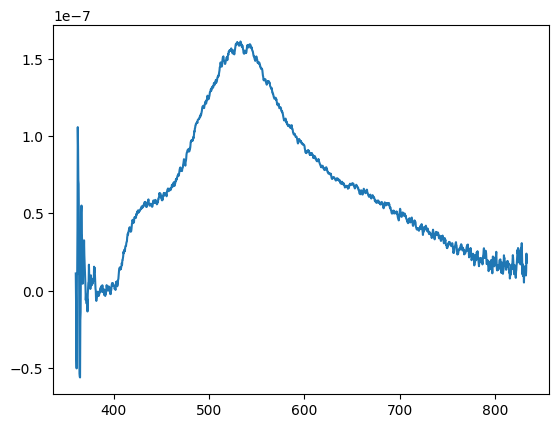

In [14]:
cie1931 = 'lin2012xyz2e_5_7sf.csv'
spr = 'led6p3_12v0052.ISD'

path = './practice_8_data/color/csv/'


sen = np.loadtxt(path + cie1931, delimiter=',')
spec = np.loadtxt(path + spr, delimiter='\t', skiprows=216)

plt.plot(spec[:, 0],spec[:, 1])
plt.show()

In [11]:
spec_int = np.interp(sen[:,0], spec[:, 0], spec[:, 1])

comp =[]
for i in range(3):
    comp1 = spec_int*sen[:, i + 1]
    x = np.sum(comp1)    
    comp.append(x)
    
print("Color coordinates:", comp)

comp = np.array(comp)

comp = comp/np.sum(comp)

print("Color coordinates (norm.):", comp)

Color coordinates: [2.1382811730145479e-06, 2.7386689866584153e-06, 1.4612432499905717e-06]
Color coordinates (norm.): [ 0.33736446  0.43208984  0.2305457 ]


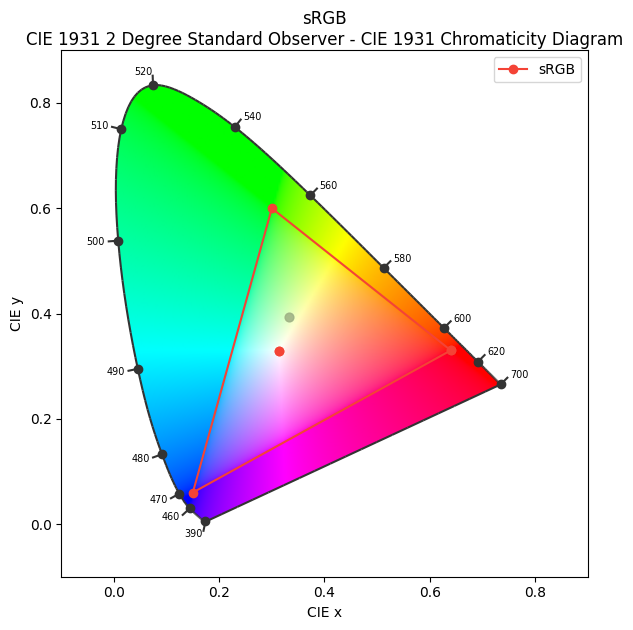

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [12]:
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(comp)

## Problem 4

Write a function to filter data (uniform filter or median filter)

See problems_examples.